In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes 
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [2]:
df= pd.read_csv("Database.csv") #I exported in csv our clear dataset 
df.head(10)

,Unnamed: 0,catv,Num_Acc,num_veh,gravite,date,lum,agg,int,atm,...,long,dep,catr,circ,vosp,prof,plan,surf,infra,situ
0,0,2,201800000001,B01,3.0,2018-01-24,1,1,4,1.0,...,294992.0,590,3,2.0,0.0,1.0,3.0,1.0,0.0,1.0
1,1,2,201800000001,A01,1.0,2018-01-24,1,1,4,1.0,...,294992.0,590,3,2.0,0.0,1.0,3.0,1.0,0.0,1.0
2,2,2,201800000002,A01,2.0,2018-02-12,1,2,7,7.0,...,293151.0,590,4,2.0,0.0,1.0,2.0,1.0,0.0,1.0
3,3,1,201800000003,A01,3.0,2018-03-04,1,2,3,1.0,...,291714.0,590,3,2.0,0.0,1.0,1.0,1.0,0.0,1.0
4,4,2,201800000003,C01,1.0,2018-03-04,1,2,3,1.0,...,291714.0,590,3,2.0,0.0,1.0,1.0,1.0,0.0,1.0
5,5,1,201800000004,B01,3.0,2018-05-05,1,2,1,7.0,...,289123.0,590,3,2.0,0.0,1.0,1.0,1.0,0.0,1.0
6,6,2,201800000004,A01,1.0,2018-05-05,1,2,1,7.0,...,289123.0,590,3,2.0,0.0,1.0,1.0,1.0,0.0,1.0
7,7,1,201800000005,A01,2.0,2018-06-26,1,2,1,1.0,...,290605.0,590,4,1.0,0.0,1.0,1.0,1.0,0.0,1.0
8,8,2,201800000005,B01,1.0,2018-06-26,1,2,1,1.0,...,290605.0,590,4,1.0,0.0,1.0,1.0,1.0,0.0,1.0
9,9,2,201800000006,A01,3.0,2018-09-23,2,2,1,2.0,...,288837.0,590,3,0.0,0.0,2.0,2.0,2.0,0.0,3.0


In [107]:
df.gravite[df.gravite == 1] = 0
df.gravite[df.gravite == 2] = 0
df.gravite[df.gravite == 3] = 1
df.gravite[df.gravite == 4] = 1

C:\Users\laura\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\laura\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\laura\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so w

### We'll keep the the accident number, the date, the gps code, the latitude and the longitude and the severity in a new dataframe

In [108]:
df_map= df[['Num_Acc','date','gps','lat', 'long', 'gravite']]
df_map.head(15)

,Num_Acc,date,gps,lat,long,gravite
0,201800000001,2018-01-24,M,5055737.0,294992.0,1.0
1,201800000001,2018-01-24,M,5055737.0,294992.0,0.0
2,201800000002,2018-02-12,M,5052936.0,293151.0,0.0
3,201800000003,2018-03-04,M,5051243.0,291714.0,1.0
4,201800000003,2018-03-04,M,5051243.0,291714.0,0.0
5,201800000004,2018-05-05,M,5051974.0,289123.0,1.0
6,201800000004,2018-05-05,M,5051974.0,289123.0,0.0
7,201800000005,2018-06-26,M,5051607.0,290605.0,0.0
8,201800000005,2018-06-26,M,5051607.0,290605.0,0.0
9,201800000006,2018-09-23,M,5052132.0,288837.0,1.0


### Since we will look at the place where the all accident occured we only need the latitude and longitude for the accident in globality we'll keep only one vehicle by accident, and we'll keep the one with the higher severity

In [109]:
df_map =df_map.groupby(['Num_Acc','date','gps','lat', 'long'], as_index=False).agg({'gravite':'max'})
df_map.head(10)

,Num_Acc,date,gps,lat,long,gravite
0,201800000001,2018-01-24,M,5055737.0,294992.0,1.0
1,201800000002,2018-02-12,M,5052936.0,293151.0,0.0
2,201800000003,2018-03-04,M,5051243.0,291714.0,1.0
3,201800000004,2018-05-05,M,5051974.0,289123.0,1.0
4,201800000005,2018-06-26,M,5051607.0,290605.0,0.0
5,201800000006,2018-09-23,M,5052132.0,288837.0,1.0
6,201800000007,2018-09-26,M,5052211.0,296652.0,1.0
7,201800000008,2018-11-30,M,5053146.0,293875.0,1.0
8,201800000009,2018-02-18,M,5053707.0,284896.0,0.0
9,201800000010,2018-03-19,M,5053639.0,281517.0,1.0


In [110]:
len(df_map)

55256

### We'll do a new dataframe for M = Métropole, A = Antilles (Martinique ou Guadeloupe), G = Guyane, R = Réunion and Y = Mayotte

### On va commencer avec la métropole 

In [111]:
df_map_M = df_map[df_map['gps'] == "M"]
df_map_M.head()

,Num_Acc,date,gps,lat,long,gravite
0,201800000001,2018-01-24,M,5055737.0,294992.0,1.0
1,201800000002,2018-02-12,M,5052936.0,293151.0,0.0
2,201800000003,2018-03-04,M,5051243.0,291714.0,1.0
3,201800000004,2018-05-05,M,5051974.0,289123.0,1.0
4,201800000005,2018-06-26,M,5051607.0,290605.0,0.0


In [112]:
len(df_map_M)

53311

In [113]:
df_map_M = df_map_M[df_map_M['long'] < 1000000]

In [114]:
len(df_map_M)

53304

In [115]:
df_map_M = df_map_M[(df_map_M['long'] > -600000) ]

In [116]:
len(df_map_M)

53304

### There were 7 outliers 

In [117]:
df_map_M.sort_values(by=['long'], inplace=True)

In [118]:
df_map_M

,Num_Acc,date,gps,lat,long,gravite
14835,201800015361,2018-07-20,M,4846142.0,-508705.0,0.0
14827,201800015352,2018-04-16,M,4846730.0,-507390.0,1.0
14840,201800015366,2018-09-08,M,4833542.0,-477113.0,1.0
14855,201800015381,2018-05-25,M,4844633.0,-476696.0,0.0
14826,201800015351,2018-02-23,M,4835947.0,-476236.0,0.0
...,...,...,...,...,...,...
4201,201800004407,2018-08-10,M,4235006.0,953264.0,1.0
19456,201800020116,2018-03-02,M,4211291.0,953384.0,1.0
19462,201800020122,2018-08-26,M,4220320.0,953476.0,0.0
17616,201800018246,2018-11-29,M,4244770.0,953584.0,0.0


In [119]:
df_map_M.long.describe()

count     53304.000000
mean     275173.089937
std      258767.550779
min     -508705.000000
25%      156360.750000
50%      240212.000000
75%      483300.000000
max      954357.000000
Name: long, dtype: float64

In [120]:
df_map_M = df_map_M.astype({"lat": int, "long": int})

In [121]:
df_map_M.dtypes

Num_Acc      int64
date        object
gps         object
lat          int32
long         int32
gravite    float64
dtype: object

### The type of the variable did change

### 1) technique where we need modify the latitude and the longitude because it's not in the good form 

### LATITUDE

In [122]:
df_map_M.gps.value_counts() #Make sure we only have the metropole

M    53304
Name: gps, dtype: int64

In [123]:
df_map_M.lat.describe()

count    5.330400e+04
mean     4.703225e+06
std      2.252377e+05
min      4.139288e+06
25%      4.524188e+06
50%      4.797172e+06
75%      4.885679e+06
max      5.121553e+06
Name: lat, dtype: float64

In [124]:
len(df_map_M)

53304

### The latitude max and min are both in e^6 so to change the latitute to the good form we wont have to make condition and just divide by 100000

In [125]:
#Just to be sure there is only latitutes greater or equal to 1 000 000
df_map_M_test = df_map_M[df_map_M['lat'] > 999999]
len(df_map_M_test)

53304

In [126]:
df_map_M.loc[:, ['lat']] = df_map_M[['lat']]/100000 

In [127]:
df_map_M.head()

,Num_Acc,date,gps,lat,long,gravite
14835,201800015361,2018-07-20,M,48.46142,-508705,0.0
14827,201800015352,2018-04-16,M,48.46730,-507390,1.0
14840,201800015366,2018-09-08,M,48.33542,-477113,1.0
14855,201800015381,2018-05-25,M,48.44633,-476696,0.0
14826,201800015351,2018-02-23,M,48.35947,-476236,0.0


In [128]:
df_map_M.lat.describe()

count    53304.000000
mean        47.032245
std          2.252377
min         41.392880
25%         45.241875
50%         47.971720
75%         48.856792
max         51.215530
Name: lat, dtype: float64

### LONGITUDE

In [129]:
df_map_M.long.describe()

count     53304.000000
mean     275173.089937
std      258767.550779
min     -508705.000000
25%      156360.750000
50%      240212.000000
75%      483300.000000
max      954357.000000
Name: long, dtype: float64

In [130]:
df_map_pos = df_map_M[df_map_M['long'] > 0]

In [131]:
df_map_pos.long.describe()

count     45346.000000
mean     350639.642835
std      195258.637240
min          57.000000
25%      229161.750000
50%      253690.000000
75%      498903.000000
max      954357.000000
Name: long, dtype: float64

### So the minimum postive longitude is 57

In [132]:
df_map_neg = df_map_M[df_map_M['long'] < 0]

In [133]:
df_map_neg.long.describe()

count      7958.000000
mean    -154847.808243
std      117870.885148
min     -508705.000000
25%     -195716.500000
50%     -135409.000000
75%      -56795.750000
max         -49.000000
Name: long, dtype: float64

###  The minimum is -508705 and the max is 954357 so will have to do different intervals to modify the longitude

In [134]:
def f(row):
    if (row['long'] > -1000000) & (row['long'] <= -1000):
        val = row['long']/100000
    elif (row['long'] > -1000) & (row['long'] <= -100):
        val = row['long']/10000
    elif (row['long'] >-100) & (row['long'] < 100):
        val = row['long']/1000
    elif (row['long'] < 1000) & (row['long'] >= 100):
        val = row['long']/10000
    elif (row['long'] < 1000000) & (row['long'] >= 1000):
        val = row['long']/100000
    return val

In [135]:
df_map_M['lon'] = df_map_M.apply(f, axis=1)

In [136]:
df_map_M.head()

,Num_Acc,date,gps,lat,long,gravite,lon
14835,201800015361,2018-07-20,M,48.46142,-508705,0.0,-5.08705
14827,201800015352,2018-04-16,M,48.46730,-507390,1.0,-5.07390
14840,201800015366,2018-09-08,M,48.33542,-477113,1.0,-4.77113
14855,201800015381,2018-05-25,M,48.44633,-476696,0.0,-4.76696
14826,201800015351,2018-02-23,M,48.35947,-476236,0.0,-4.76236


In [137]:
df_map_M.lon.describe()

count    53304.000000
mean         2.751738
std          2.587668
min         -5.087050
25%          1.563608
50%          2.402120
75%          4.833000
max          9.543570
Name: lon, dtype: float64

In [138]:
df_map_M= df_map_M[['Num_Acc','date','gps','lat', 'gravite', 'lon']]

In [139]:
df_map_M.to_csv('Df_map_Metropole.csv')

### Import French map 

In [140]:
france_M_map = gpd.read_file('C:/Users/laura/OneDrive/Documents/MAG3/Semestre 1/Methodologie des études économétriques/Projet Méthodologie/map/gadm36_FRA_shp')

<AxesSubplot:>

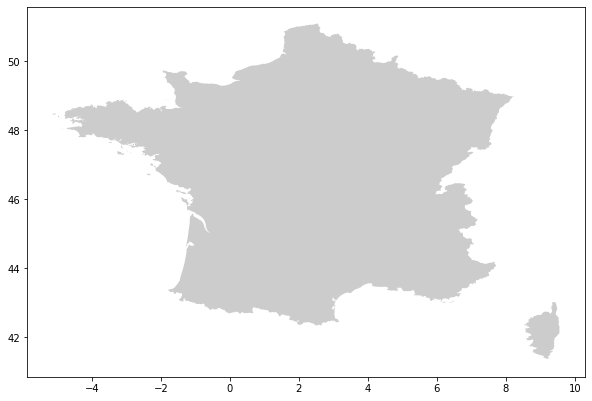

In [141]:
fig,ax = plt.subplots(figsize = (10,10))
france_M_map.plot(ax= ax, alpha = 0.4, color="grey")

### Get the data in the right form

In [142]:
df_map_M = df_map_M
crs = {'init':'epsg:4326'}
df_map_M.head()

,Num_Acc,date,gps,lat,gravite,lon
14835,201800015361,2018-07-20,M,48.46142,0.0,-5.08705
14827,201800015352,2018-04-16,M,48.46730,1.0,-5.07390
14840,201800015366,2018-09-08,M,48.33542,1.0,-4.77113
14855,201800015381,2018-05-25,M,48.44633,0.0,-4.76696
14826,201800015351,2018-02-23,M,48.35947,0.0,-4.76236


In [143]:
geometry = [Point(xy) for xy in zip(df_map_M["lon"], df_map_M["lat"])]
geometry[:3]

### transforming the latitude and longitude into a point 

In [144]:
geo_df = gpd.GeoDataFrame(df_map_M, 
                         crs = crs,
                         geometry = geometry)
geo_df.head()

,Num_Acc,date,gps,lat,gravite,lon,geometry
14835,201800015361,2018-07-20,M,48.46142,0.0,-5.08705,POINT (-5.08705 48.46142)
14827,201800015352,2018-04-16,M,48.46730,1.0,-5.07390,POINT (-5.07390 48.46730)
14840,201800015366,2018-09-08,M,48.33542,1.0,-4.77113,POINT (-4.77113 48.33542)
14855,201800015381,2018-05-25,M,48.44633,0.0,-4.76696,POINT (-4.76696 48.44633)
14826,201800015351,2018-02-23,M,48.35947,0.0,-4.76236,POINT (-4.76236 48.35947)


### Print the map 

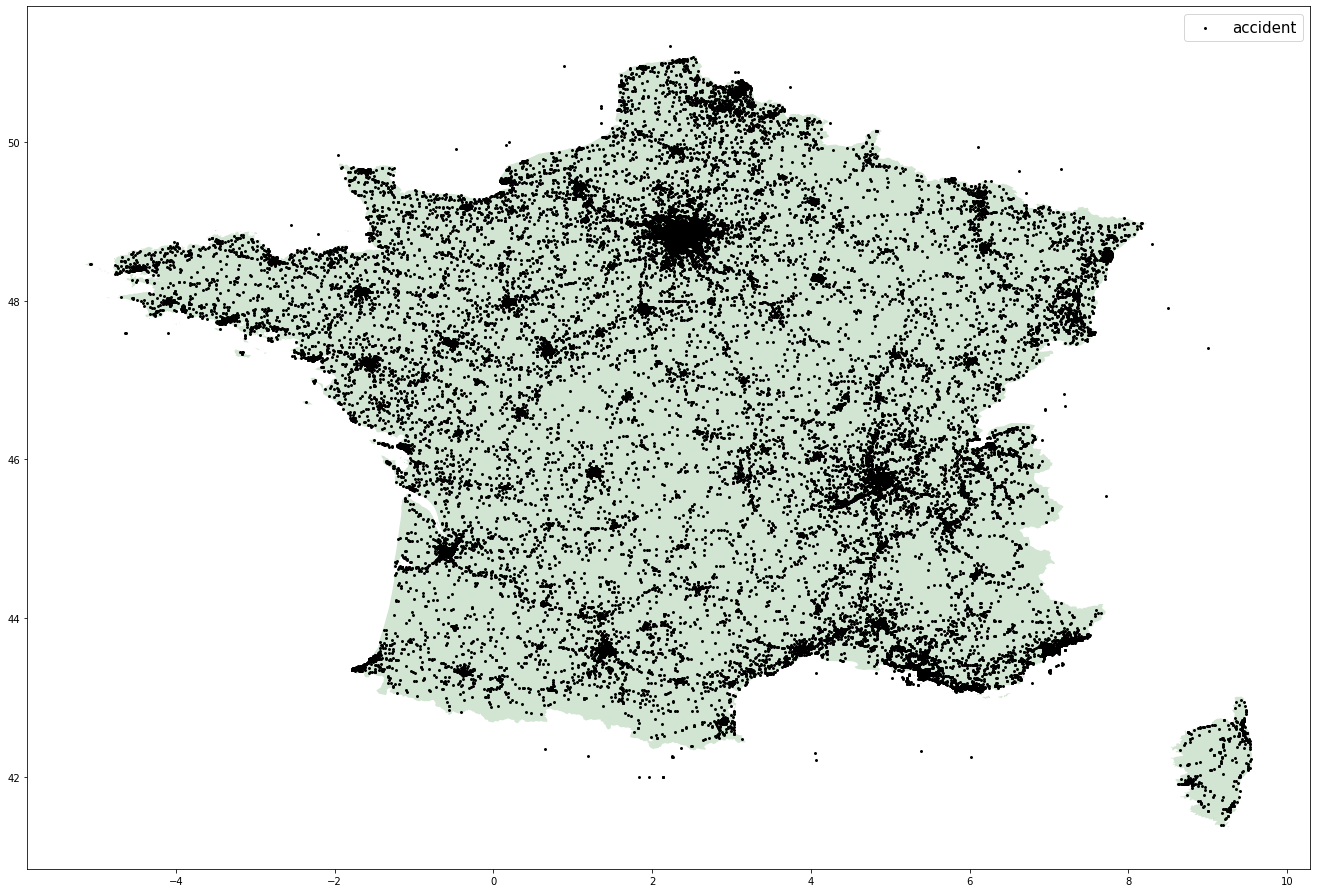

In [145]:
fig,ax = plt.subplots(figsize = (23,23))
france_M_map.plot(ax= ax, alpha = 0.4, color="darkseagreen")
geo_df.plot(ax=ax, markersize = 15, color = "black", marker=".", label = "accident")
plt.legend(prop={'size': 15})
plt.savefig('map_fr_accidents.png')

### same map but with different dates 

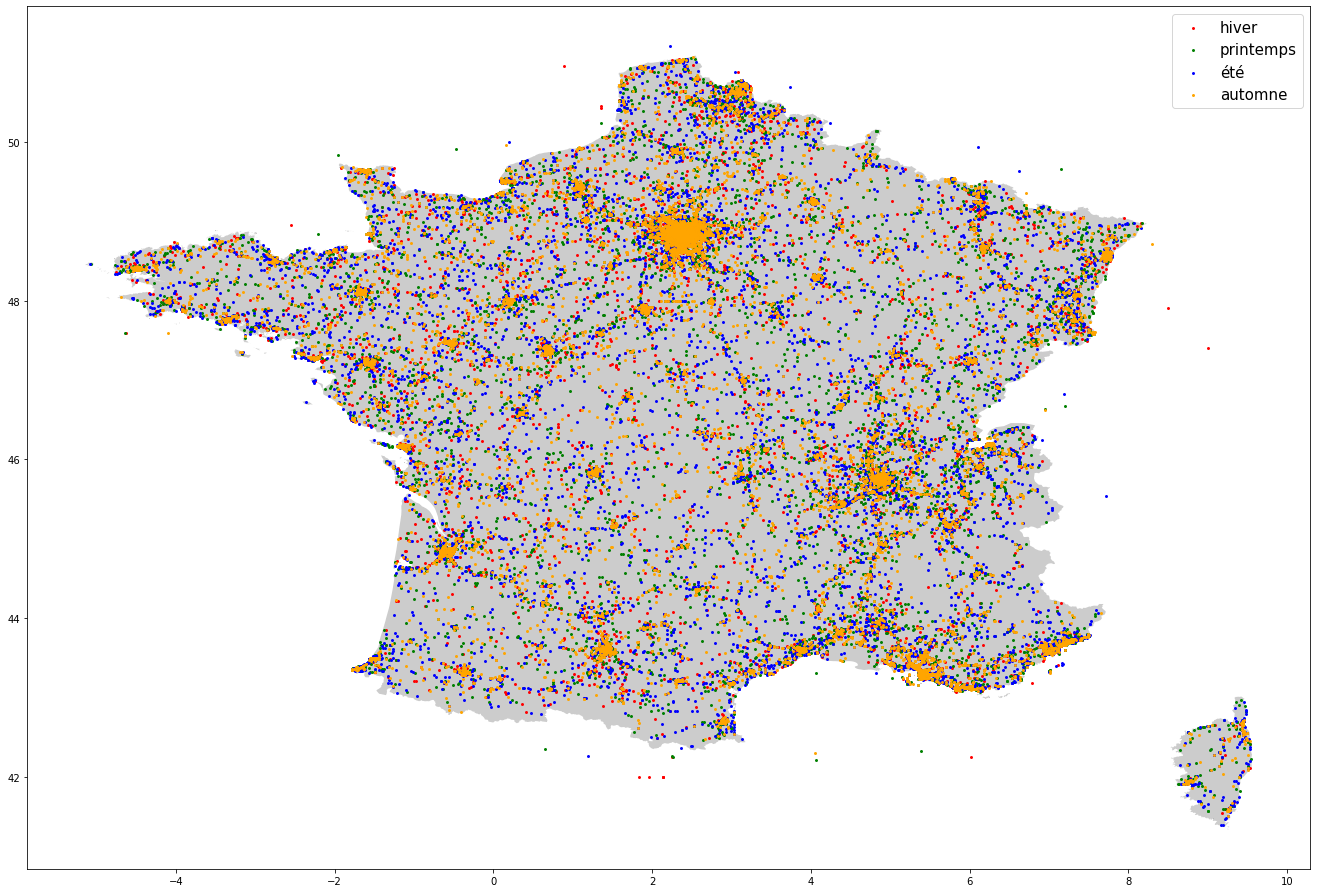

In [41]:
fig,ax = plt.subplots(figsize = (23,23))
france_M_map.plot(ax= ax, alpha = 0.4, color="grey")
geo_df[geo_df['date'] < '2018-04-01'].plot(ax=ax, markersize = 15, color = "red", marker=".", label = "hiver")
geo_df[(geo_df['date'] >= '2018-04-01')  & (geo_df['date'] < '2018-07-01')].plot(ax=ax, markersize = 15, color = "green", marker=".", label = "printemps")
geo_df[(geo_df['date'] >= '2018-07-01')  & (geo_df['date'] < '2018-10-01')].plot(ax=ax, markersize = 15, color = "blue", marker=".", label = "été")
geo_df[(geo_df['date'] >= '2018-10-01')  & (geo_df['date'] <= '2018-12-31')].plot(ax=ax, markersize = 15, color = "orange", marker=".", label = "automne")
plt.legend(prop={'size': 15})

#### Pas très significatif comme ça

### Regardons saison par saison 

Text(0.5, 1.0, 'Accidents ayant eu lieu en Hiver 2018')

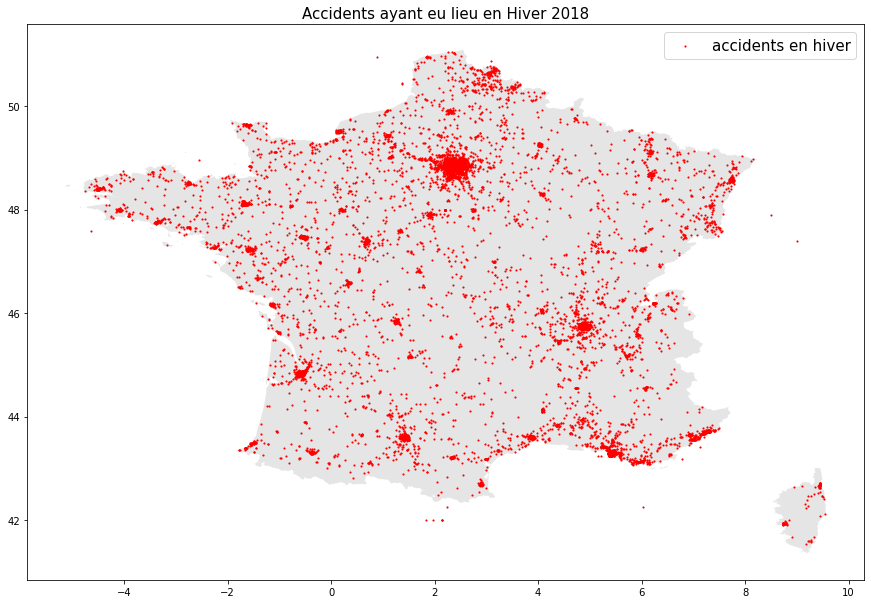

In [42]:
fig,ax = plt.subplots(figsize = (15,15))
france_M_map.plot(ax= ax, alpha = 0.4, color="silver")
geo_df[geo_df['date'] < '2018-04-01'].plot(ax=ax, markersize = 5, color = "red", marker=".", label = "accidents en hiver")
plt.legend(prop={'size': 15})
plt.title("Accidents ayant eu lieu en Hiver 2018", fontsize=15)

Text(0.5, 1.0, 'Accidents ayant eu lieu en printemps 2018')

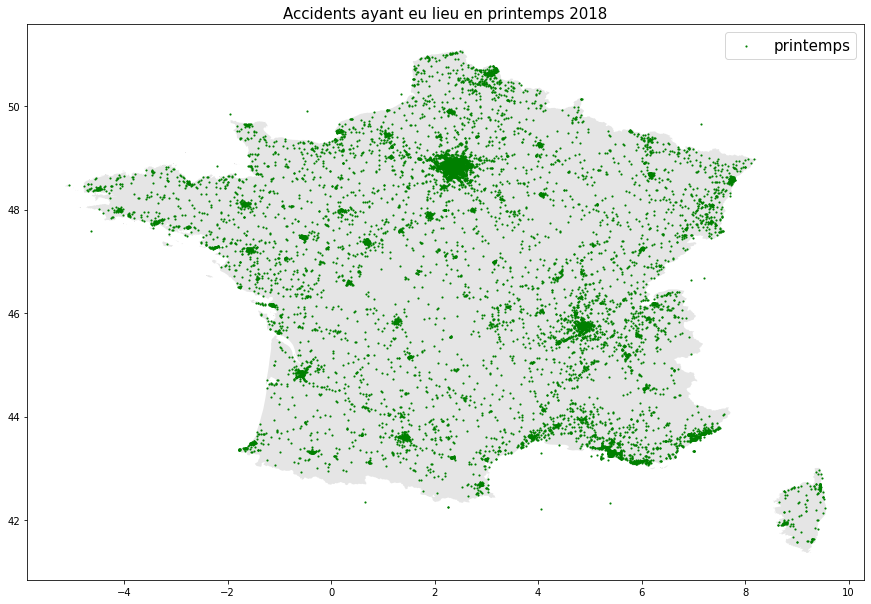

In [43]:
fig,ax = plt.subplots(figsize = (15,15))
france_M_map.plot(ax= ax, alpha = 0.4, color="silver")
geo_df[(geo_df['date'] >= '2018-04-01')  & (geo_df['date'] < '2018-07-01')].plot(ax=ax, markersize = 5, color = "green", marker=".", label = "printemps")
plt.legend(prop={'size': 15})
plt.title("Accidents ayant eu lieu en printemps 2018", fontsize=15)

Text(0.5, 1.0, 'Accidents ayant eu lieu en été 2018')

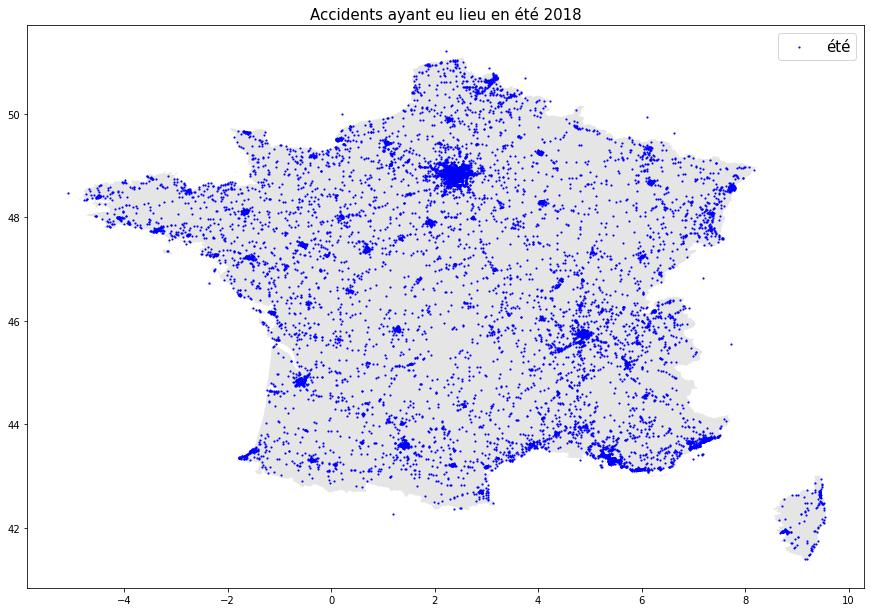

In [44]:
fig,ax = plt.subplots(figsize = (15,15))
france_M_map.plot(ax= ax, alpha = 0.4, color="silver")
geo_df[(geo_df['date'] >= '2018-07-01')  & (geo_df['date'] < '2018-10-01')].plot(ax=ax, markersize = 5, color = "blue", marker=".", label = "été")
plt.legend(prop={'size': 15})
plt.title("Accidents ayant eu lieu en été 2018", fontsize=15)

Text(0.5, 1.0, 'Accidents ayant eu lieu en automne 2018')

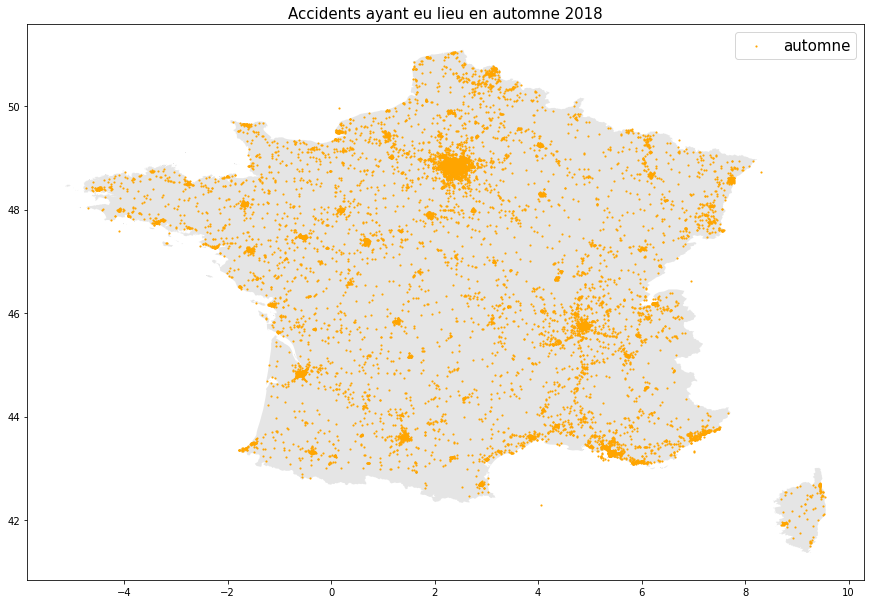

In [45]:
fig,ax = plt.subplots(figsize = (15,15))
france_M_map.plot(ax= ax, alpha = 0.4, color="silver")
geo_df[(geo_df['date'] >= '2018-10-01')  & (geo_df['date'] <= '2018-12-31')].plot(ax=ax, markersize = 5, color = "orange", marker=".", label = "automne")
plt.legend(prop={'size': 15})
plt.title("Accidents ayant eu lieu en automne 2018", fontsize=15)

Peut pas dire grand-chose de ça..

Essayons maintenant d'intégré la gravité des véhicules accidentés. 

### Map selon la gravité

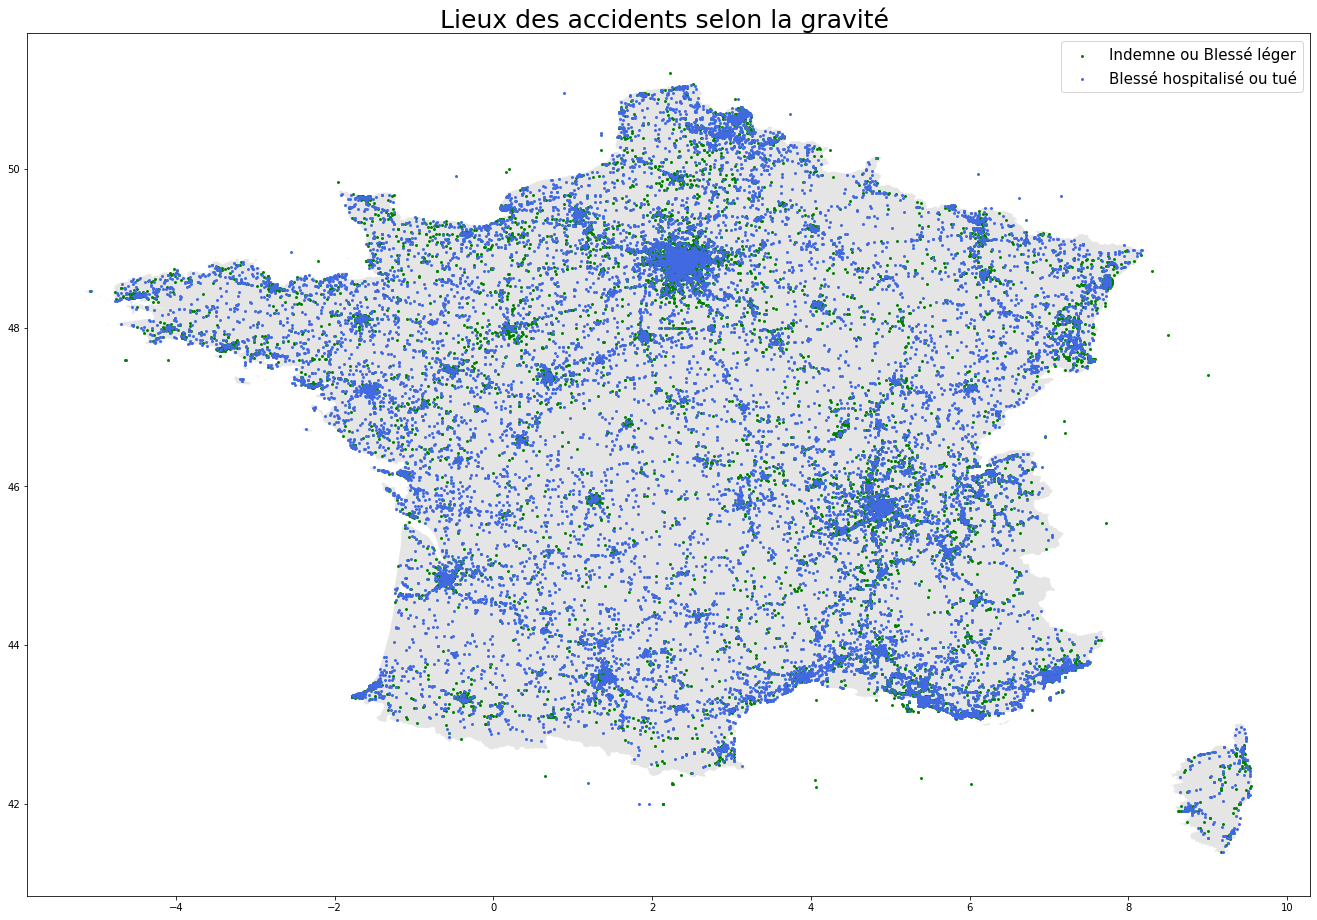

In [146]:
fig,ax = plt.subplots(figsize = (23,23))
france_M_map.plot(ax= ax, alpha = 0.4, color="silver")
geo_df[geo_df['gravite'] == 0].plot(ax=ax, markersize = 15, color = "green", marker=".", label = "Indemne ou Blessé léger")
geo_df[geo_df['gravite'] == 1].plot(ax=ax, markersize = 15, color = "royalblue", marker=".", label = "Blessé hospitalisé ou tué")
plt.legend(prop={'size': 15})
plt.title("Lieux des accidents selon la gravité ", fontsize=25)    
plt.savefig('map_FR_grav_acc.png')          

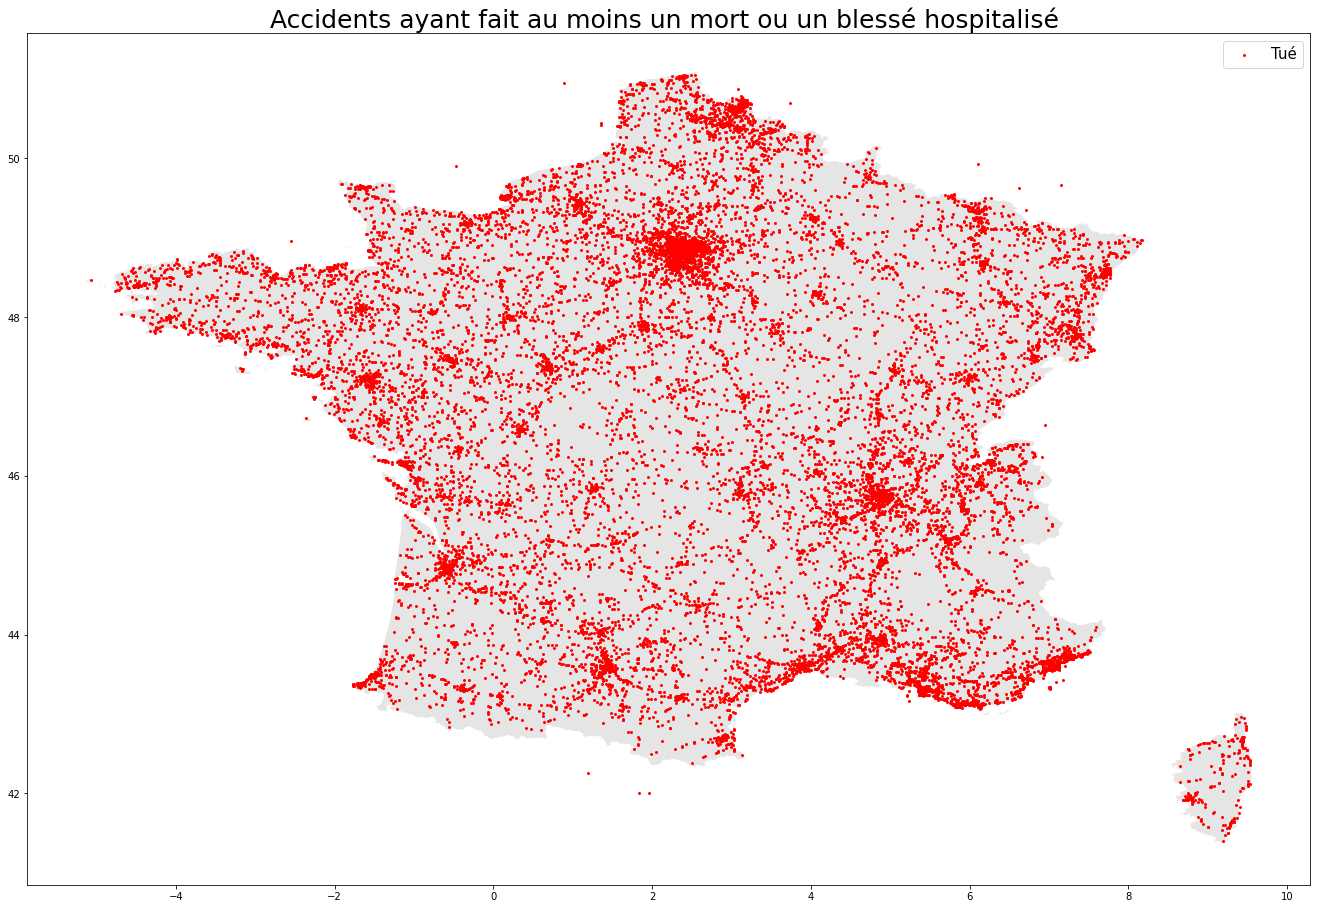

In [150]:
fig,ax = plt.subplots(figsize = (23,23))
france_M_map.plot(ax= ax, alpha = 0.4, color="silver")
geo_df[geo_df['gravite'] == 1].plot(ax=ax, markersize = 15, color = "red", marker=".", label = "Tué ou hospitalisé")
plt.legend(prop={'size': 15})
plt.title("Accidents ayant fait au moins un mort ou un blessé hospitalisé ", fontsize=25)                
plt.savefig('map_FR_grav_acc_4.png')   

In [50]:
df_map.gravite.value_counts()

2.0    33720
3.0    18455
4.0     3081
Name: gravite, dtype: int64

Veut dire qu'il n'y a pas un seul accident où les personnes concernées sont indemnes. Au minimum un blessé leger. 

Text(0.5, 1.0, "Accidents ayant entrainé la mort d'au moins une personne selon les saisons")

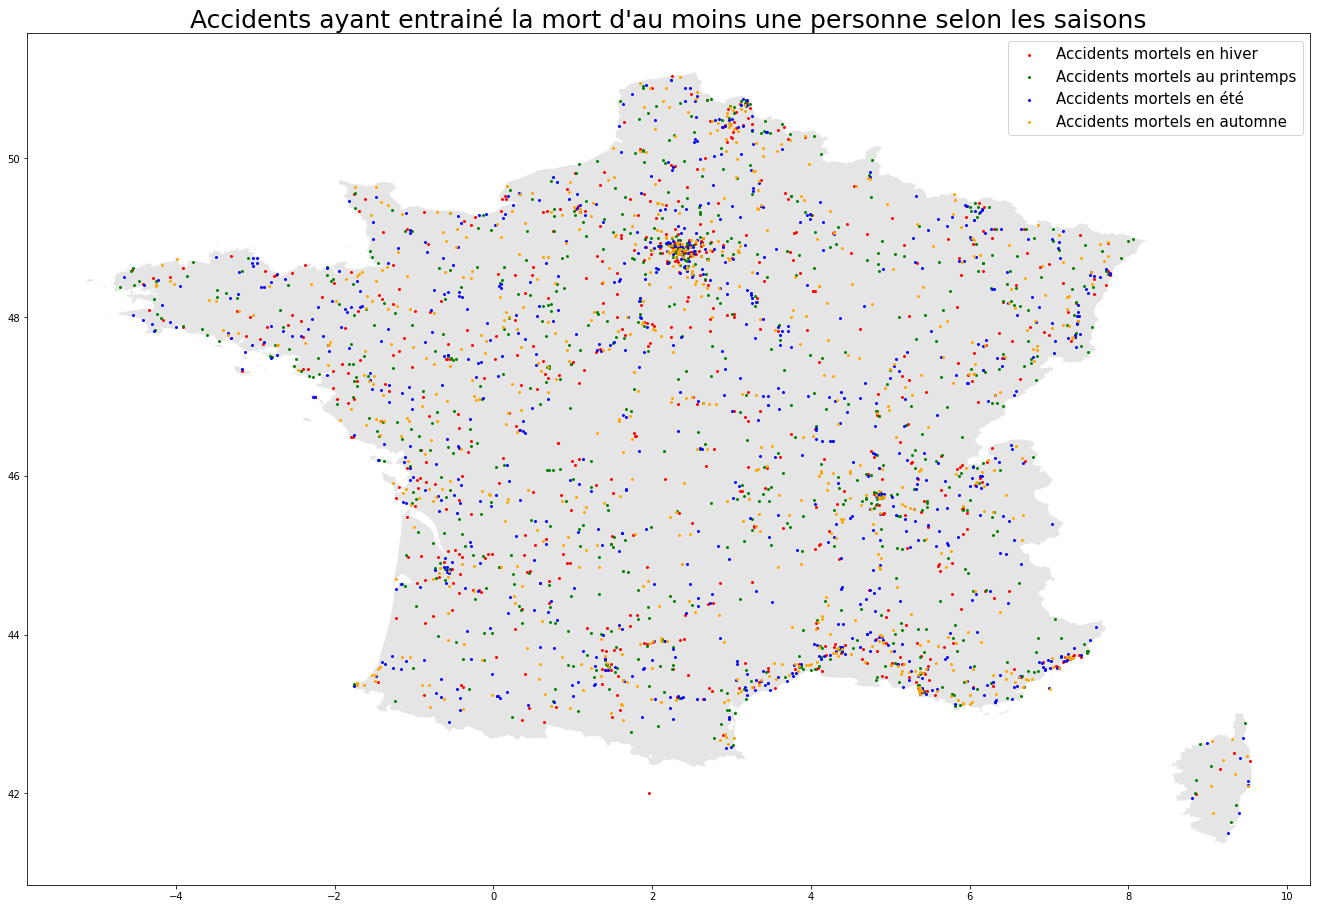

In [51]:
fig,ax = plt.subplots(figsize = (23,23))
france_M_map.plot(ax= ax, alpha = 0.4, color="silver")
geo_df[(geo_df['gravite'] == 4) & (geo_df['date'] < '2018-04-01')].plot(ax=ax, markersize = 15, color = "red", marker=".", label = "Accidents mortels en hiver")
geo_df[(geo_df['gravite'] == 4) & (geo_df['date'] >= '2018-04-01')  & (geo_df['date'] < '2018-07-01')].plot(ax=ax, markersize = 15, color = "green", marker=".", label = "Accidents mortels au printemps")
geo_df[(geo_df['gravite'] == 4) & (geo_df['date'] >= '2018-07-01')  & (geo_df['date'] < '2018-10-01')].plot(ax=ax, markersize = 15, color = "blue", marker=".", label = "Accidents mortels en été")
geo_df[(geo_df['gravite'] == 4) & (geo_df['date'] >= '2018-10-01')  & (geo_df['date'] <= '2018-12-31')].plot(ax=ax, markersize = 15, color = "orange", marker=".", label = "Accidents mortels en automne")
plt.legend(prop={'size': 15})
plt.title("Accidents ayant entrainé la mort d'au moins une personne selon les saisons", fontsize=25)                


Text(0.5, 1.0, "Accidents ayant entrainé la mort d'au moins une personne en hiver")

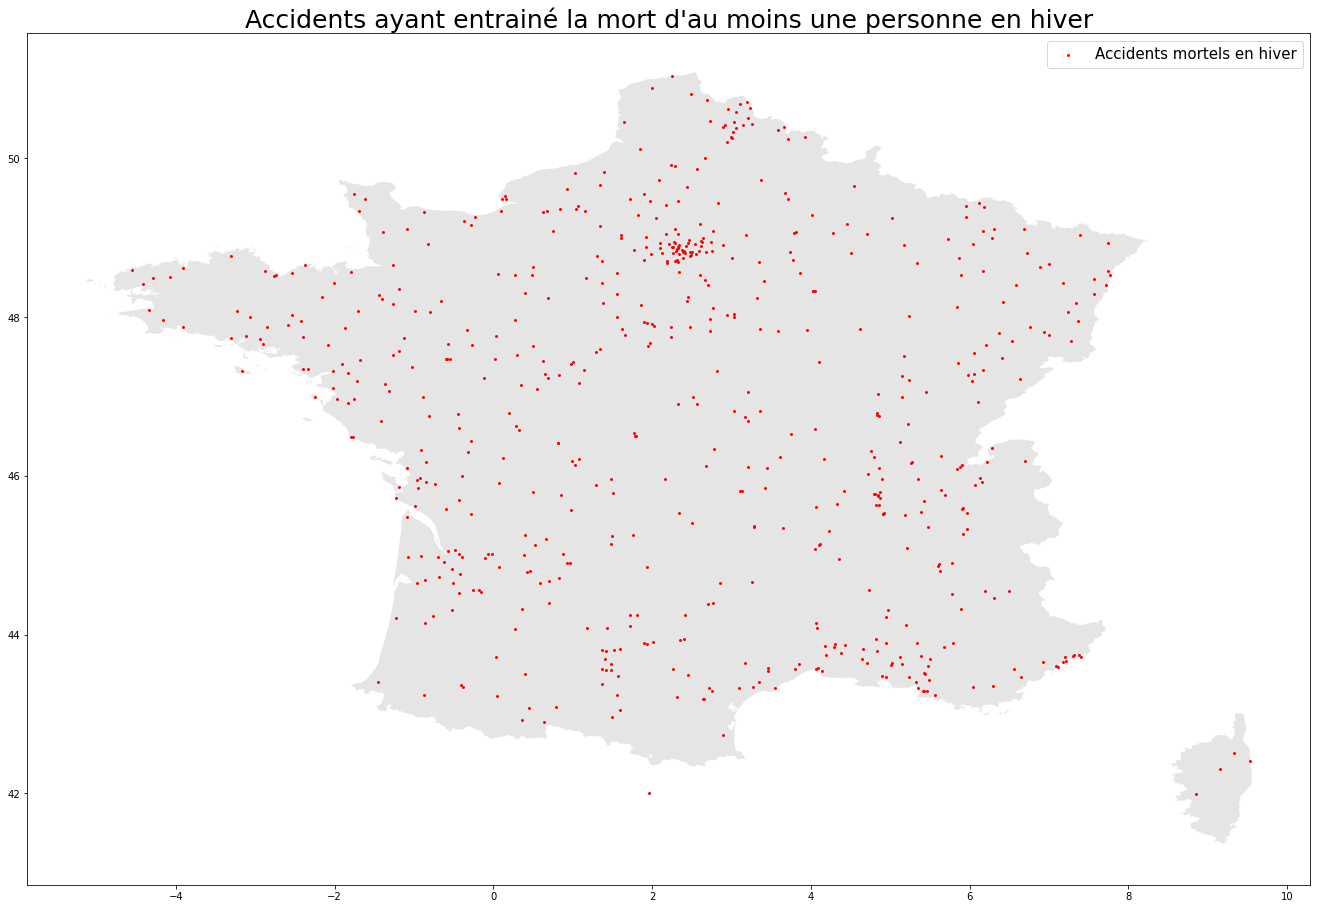

In [52]:
fig,ax = plt.subplots(figsize = (23,23))
france_M_map.plot(ax= ax, alpha = 0.4, color="silver")
geo_df[(geo_df['gravite'] == 4) & (geo_df['date'] < '2018-04-01')].plot(ax=ax, markersize = 15, color = "red", marker=".", label = "Accidents mortels en hiver")
plt.legend(prop={'size': 15})
plt.title("Accidents ayant entrainé la mort d'au moins une personne en hiver", fontsize=25)                


Text(0.5, 1.0, "Accidents ayant entrainé la mort d'au moins une personne au printemps")

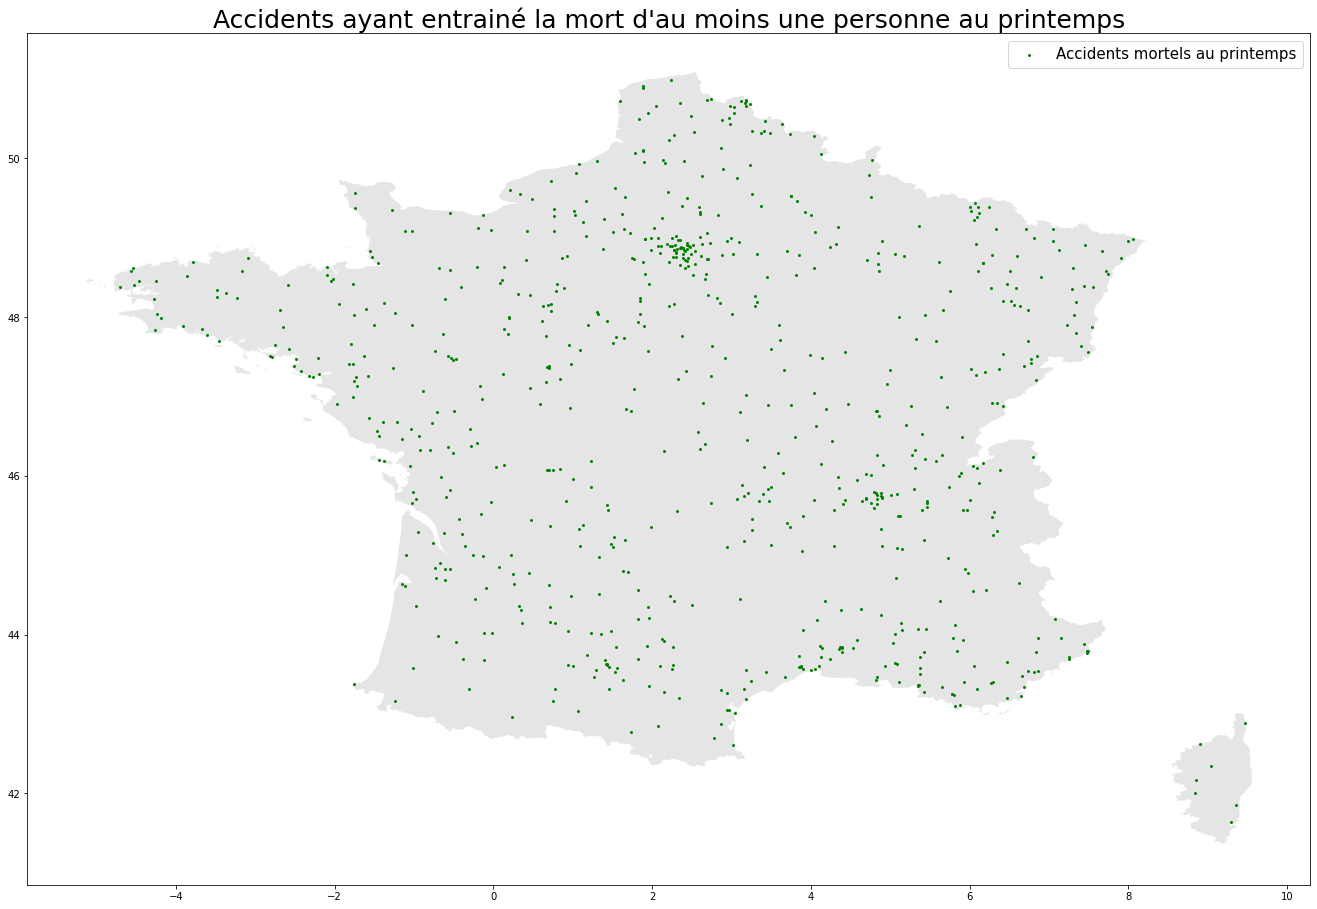

In [53]:
fig,ax = plt.subplots(figsize = (23,23))
france_M_map.plot(ax= ax, alpha = 0.4, color="silver")
geo_df[(geo_df['gravite'] == 4) & (geo_df['date'] >= '2018-04-01')  & (geo_df['date'] < '2018-07-01')].plot(ax=ax, markersize = 15, color = "green", marker=".", label = "Accidents mortels au printemps")
plt.legend(prop={'size': 15})
plt.title("Accidents ayant entrainé la mort d'au moins une personne au printemps", fontsize=25)                


Text(0.5, 1.0, "Accidents ayant entrainé la mort d'au moins une personne en été ")

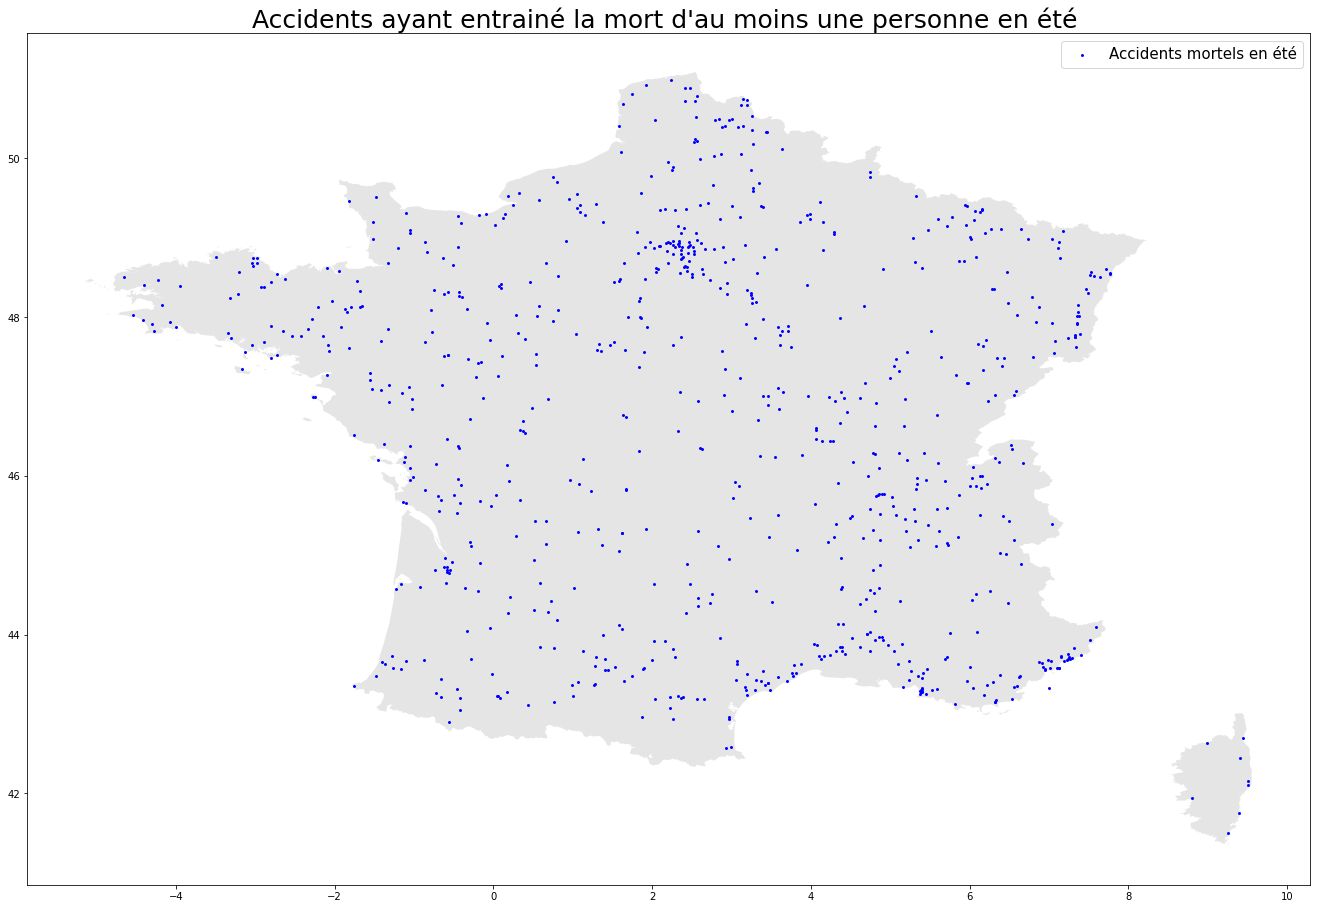

In [54]:
fig,ax = plt.subplots(figsize = (23,23))
france_M_map.plot(ax= ax, alpha = 0.4, color="silver")
geo_df[(geo_df['gravite'] == 4) & (geo_df['date'] >= '2018-07-01')  & (geo_df['date'] < '2018-10-01')].plot(ax=ax, markersize = 15, color = "blue", marker=".", label = "Accidents mortels en été")
plt.legend(prop={'size': 15})
plt.title("Accidents ayant entrainé la mort d'au moins une personne en été ", fontsize=25)                


Text(0.5, 1.0, "Accidents ayant entrainé la mort d'au moins une personne en automne ")

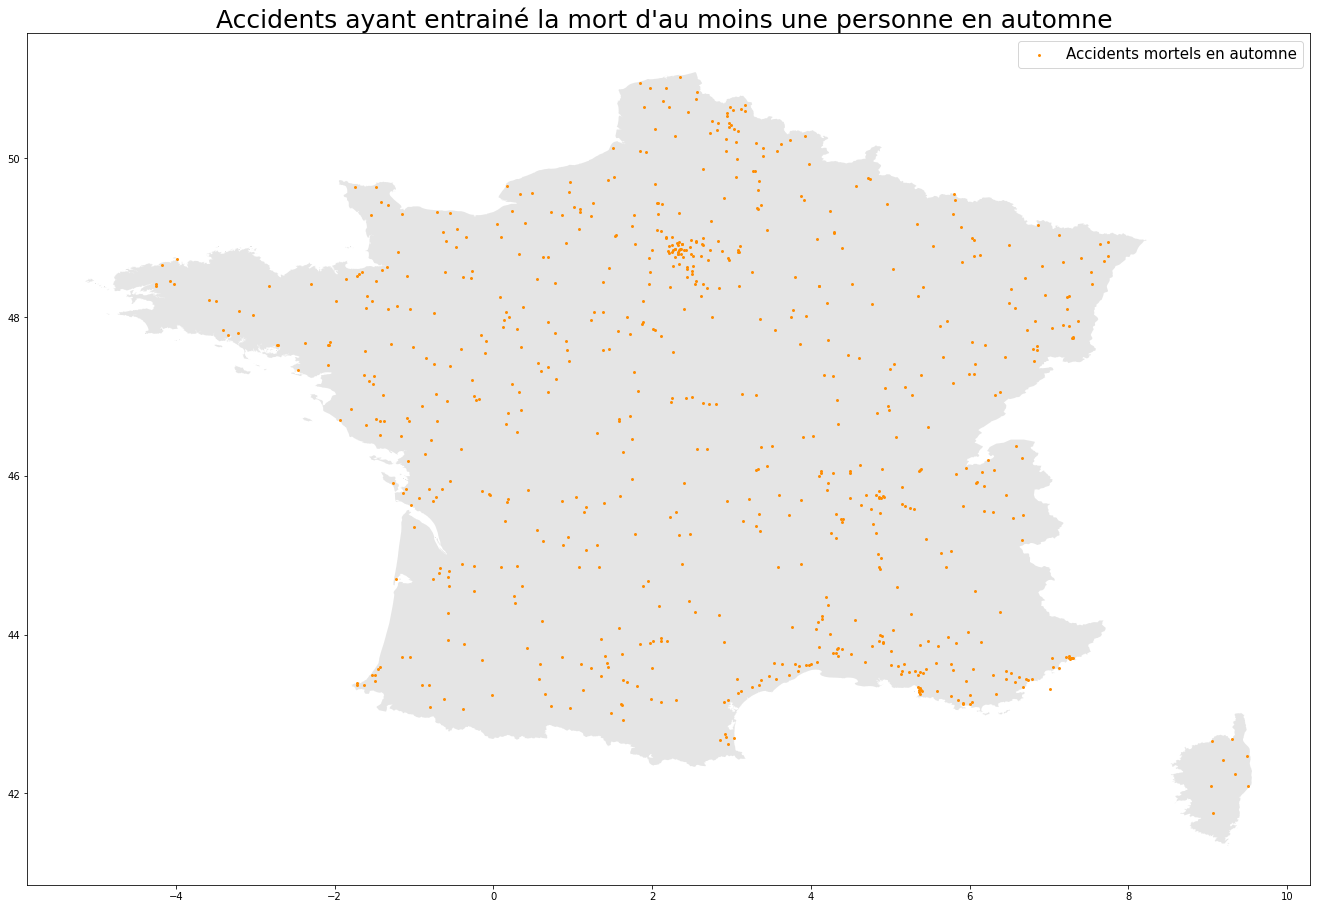

In [55]:
fig,ax = plt.subplots(figsize = (23,23))
france_M_map.plot(ax= ax, alpha = 0.4, color="silver")
geo_df[(geo_df['gravite'] == 4) & (geo_df['date'] >= '2018-10-01')  & (geo_df['date'] <= '2018-12-31')].plot(ax=ax, markersize = 15, color = "darkorange", marker=".", label = "Accidents mortels en automne")
plt.legend(prop={'size': 15})
plt.title("Accidents ayant entrainé la mort d'au moins une personne en automne ", fontsize=25)                


### Peu revelateur et utile.. Peut peut-être faire un indicateurs en prenant en compte le nombre d'habitants?

# Pour les DOM TOM  : 

A = Antilles (Martinique ou Guadeloupe), G = Guyane, R = Réunion and Y = Mayotte

### ANTILLES : Gouadeloupe et Martinique 

In [56]:
df_map_A = df_map[df_map['gps'] == "A"]
df_map_A.head()

,Num_Acc,date,gps,lat,long,gravite
53311,201800055767,2018-12-31,A,1465208.0,6102822.0,3.0
53312,201800055768,2018-01-24,A,1465672.0,6101216.0,3.0
53313,201800055769,2018-04-22,A,1467894.0,6104060.0,3.0
53314,201800055770,2018-11-08,A,1466831.0,6102980.0,3.0
53315,201800055771,2018-11-08,A,1466845.0,6103457.0,3.0


In [57]:
df_map_A = df_map_A.astype({"lat": int, "long": int})

In [58]:
df_map_A.lat.describe()

count    5.630000e+02
mean     1.552939e+06
std      7.916014e+04
min      1.443561e+06
25%      1.461714e+06
50%      1.601671e+06
75%      1.625116e+06
max      1.646987e+06
Name: lat, dtype: float64

In [59]:
df_map_A.loc[:, ['lat']] = df_map_A[['lat']]/100000 

In [60]:
df_map_A.head(10)

,Num_Acc,date,gps,lat,long,gravite
53311,201800055767,2018-12-31,A,14.65208,6102822,3.0
53312,201800055768,2018-01-24,A,14.65672,6101216,3.0
53313,201800055769,2018-04-22,A,14.67894,6104060,3.0
53314,201800055770,2018-11-08,A,14.66831,6102980,3.0
53315,201800055771,2018-11-08,A,14.66845,6103457,3.0
53316,201800055772,2018-11-08,A,14.66311,6101695,3.0
53317,201800055773,2018-02-18,A,14.73205,6000000,3.0
53318,201800055774,2018-05-12,A,14.74361,6000000,3.0
53319,201800055775,2018-06-30,A,14.73522,6000000,2.0
53320,201800055776,2018-08-26,A,14.73726,6000000,3.0


In [61]:
df_map_A.long.describe()

count    5.630000e+02
mean     6.116735e+06
std      5.456792e+04
min      6.000000e+06
25%      6.105191e+06
50%      6.134836e+06
75%      6.153444e+06
max      6.180399e+06
Name: long, dtype: float64

In [62]:
df_map_A.loc[:, ['long']] = (df_map_A[['long']]/100000 )* -1

In [63]:
df_map_A.head(10)

,Num_Acc,date,gps,lat,long,gravite
53311,201800055767,2018-12-31,A,14.65208,-61.02822,3.0
53312,201800055768,2018-01-24,A,14.65672,-61.01216,3.0
53313,201800055769,2018-04-22,A,14.67894,-61.04060,3.0
53314,201800055770,2018-11-08,A,14.66831,-61.02980,3.0
53315,201800055771,2018-11-08,A,14.66845,-61.03457,3.0
53316,201800055772,2018-11-08,A,14.66311,-61.01695,3.0
53317,201800055773,2018-02-18,A,14.73205,-60.00000,3.0
53318,201800055774,2018-05-12,A,14.74361,-60.00000,3.0
53319,201800055775,2018-06-30,A,14.73522,-60.00000,2.0
53320,201800055776,2018-08-26,A,14.73726,-60.00000,3.0


In [64]:
df_map_A = df_map_A[(df_map_A['long'] < -60.00000) ]

In [65]:
df_map_A.head(10)

,Num_Acc,date,gps,lat,long,gravite
53311,201800055767,2018-12-31,A,14.65208,-61.02822,3.0
53312,201800055768,2018-01-24,A,14.65672,-61.01216,3.0
53313,201800055769,2018-04-22,A,14.67894,-61.04060,3.0
53314,201800055770,2018-11-08,A,14.66831,-61.02980,3.0
53315,201800055771,2018-11-08,A,14.66845,-61.03457,3.0
53316,201800055772,2018-11-08,A,14.66311,-61.01695,3.0
53324,201800055780,2018-01-07,A,14.77851,-61.02905,3.0
53325,201800055781,2018-01-24,A,14.77475,-61.03479,3.0
53326,201800055782,2018-11-13,A,14.76123,-61.03639,2.0
53328,201800055784,2018-02-14,A,16.01766,-61.72897,4.0


In [66]:
guadeloupe_map = gpd.read_file('C:/Users/laura/OneDrive/Documents/MAG3/Semestre 1/Methodologie des études économétriques/Projet Méthodologie/map/departement-971-Guadeloupe')
martinique_map = gpd.read_file('C:/Users/laura/OneDrive/Documents/MAG3/Semestre 1/Methodologie des études économétriques/Projet Méthodologie/map/departement-972-Martinique')

<AxesSubplot:>

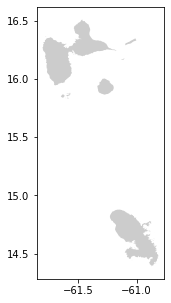

In [67]:
fig,ax = plt.subplots(figsize = (5,5))
guadeloupe_map.plot(ax= ax, alpha = 0.4, color="grey")
martinique_map.plot(ax= ax, alpha = 0.4, color="grey")

In [68]:
df_map_A = df_map_A
crs = {'init':'epsg:4326'}
df_map_A.head()

,Num_Acc,date,gps,lat,long,gravite
53311,201800055767,2018-12-31,A,14.65208,-61.02822,3.0
53312,201800055768,2018-01-24,A,14.65672,-61.01216,3.0
53313,201800055769,2018-04-22,A,14.67894,-61.04060,3.0
53314,201800055770,2018-11-08,A,14.66831,-61.02980,3.0
53315,201800055771,2018-11-08,A,14.66845,-61.03457,3.0


In [69]:
geometry_A = [Point(xy) for xy in zip(df_map_A["long"], df_map_A["lat"])]
geometry_A[:3]

In [70]:
geo_df_A = gpd.GeoDataFrame(df_map_A, 
                         crs = crs,
                         geometry = geometry_A)
geo_df_A.head()

,Num_Acc,date,gps,lat,long,gravite,geometry
53311,201800055767,2018-12-31,A,14.65208,-61.02822,3.0,POINT (-61.02822 14.65208)
53312,201800055768,2018-01-24,A,14.65672,-61.01216,3.0,POINT (-61.01216 14.65672)
53313,201800055769,2018-04-22,A,14.67894,-61.04060,3.0,POINT (-61.04060 14.67894)
53314,201800055770,2018-11-08,A,14.66831,-61.02980,3.0,POINT (-61.02980 14.66831)
53315,201800055771,2018-11-08,A,14.66845,-61.03457,3.0,POINT (-61.03457 14.66845)


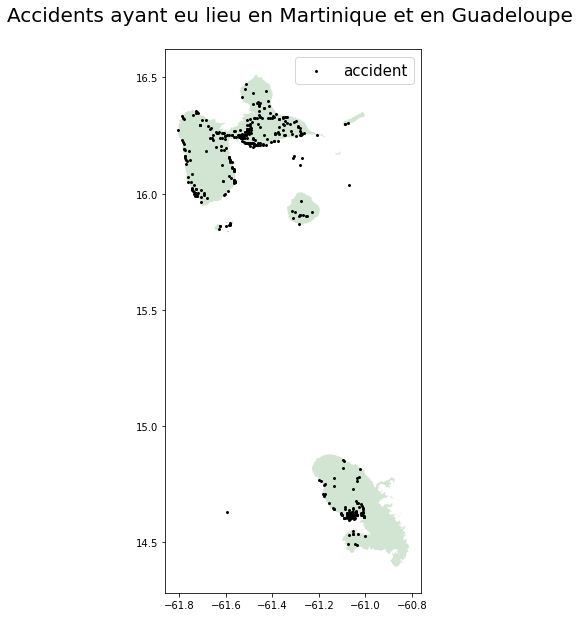

In [71]:
fig,ax = plt.subplots(figsize = (10,10))
guadeloupe_map.plot(ax= ax, alpha = 0.4, color="darkseagreen")
martinique_map.plot(ax= ax, alpha = 0.4, color="darkseagreen")
geo_df_A.plot(ax=ax, markersize = 15, color = "black", marker=".", label = "accident")
plt.legend(prop={'size': 15})
plt.title("Accidents ayant eu lieu en Martinique et en Guadeloupe \n ", fontsize=20)                
plt.savefig('map_MG_accidents.png')

### GUYANE

In [72]:
df_map_G = df_map[df_map['gps'] == "G"]
df_map_G.head()

,Num_Acc,date,gps,lat,long,gravite
53511,201800055972,2018-03-01,G,501928.0,5248030.0,4.0
53512,201800055973,2018-04-10,G,494973.0,5242403.0,2.0
53513,201800055974,2018-04-18,G,491513.0,5237490.0,2.0
53514,201800055975,2018-04-19,G,493404.0,5250613.0,3.0
53515,201800055976,2018-05-03,G,493172.0,5239939.0,4.0


In [73]:
df_map_G = df_map_G.astype({"lat": int, "long": int})
df_map_G.lat.describe()

count       511.000000
mean     497351.814090
std       18890.860412
min      364247.000000
25%      491506.500000
50%      493085.000000
75%      493939.500000
max      570103.000000
Name: lat, dtype: float64

In [74]:
df_map_G.loc[:, ['lat']] = df_map_G[['lat']]/100000 
df_map_G.head()

,Num_Acc,date,gps,lat,long,gravite
53511,201800055972,2018-03-01,G,5.01928,5248030,4.0
53512,201800055973,2018-04-10,G,4.94973,5242403,2.0
53513,201800055974,2018-04-18,G,4.91513,5237490,2.0
53514,201800055975,2018-04-19,G,4.93404,5250613,3.0
53515,201800055976,2018-05-03,G,4.93172,5239939,4.0


In [75]:
df_map_G.long.describe()

count    5.110000e+02
mean     5.248833e+06
std      4.805108e+04
min      5.180280e+06
25%      5.231200e+06
50%      5.232250e+06
75%      5.233282e+06
max      5.434188e+06
Name: long, dtype: float64

In [76]:
df_map_G.loc[:, ['long']] = (df_map_G[['long']]/100000 )* -1
df_map_G.head()

,Num_Acc,date,gps,lat,long,gravite
53511,201800055972,2018-03-01,G,5.01928,-52.48030,4.0
53512,201800055973,2018-04-10,G,4.94973,-52.42403,2.0
53513,201800055974,2018-04-18,G,4.91513,-52.37490,2.0
53514,201800055975,2018-04-19,G,4.93404,-52.50613,3.0
53515,201800055976,2018-05-03,G,4.93172,-52.39939,4.0


In [77]:
guyane_map = gpd.read_file('C:/Users/laura/OneDrive/Documents/MAG3/Semestre 1/Methodologie des études économétriques/Projet Méthodologie/map/departement-973-Guyane')

<AxesSubplot:>

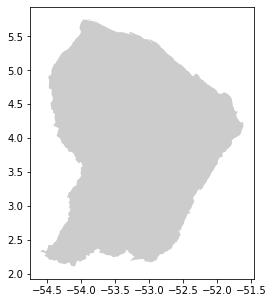

In [78]:
fig,ax = plt.subplots(figsize = (5,5))
guyane_map.plot(ax= ax, alpha = 0.4, color="grey")

In [79]:
df_map_G = df_map_G
crs = {'init':'epsg:4326'}
df_map_G.head()

,Num_Acc,date,gps,lat,long,gravite
53511,201800055972,2018-03-01,G,5.01928,-52.48030,4.0
53512,201800055973,2018-04-10,G,4.94973,-52.42403,2.0
53513,201800055974,2018-04-18,G,4.91513,-52.37490,2.0
53514,201800055975,2018-04-19,G,4.93404,-52.50613,3.0
53515,201800055976,2018-05-03,G,4.93172,-52.39939,4.0


In [80]:
geometry_G = [Point(xy) for xy in zip(df_map_G["long"], df_map_G["lat"])]
geometry_G[:3]

In [81]:
geo_df_G = gpd.GeoDataFrame(df_map_G, 
                         crs = crs,
                         geometry = geometry_G)
geo_df_G.head()

,Num_Acc,date,gps,lat,long,gravite,geometry
53511,201800055972,2018-03-01,G,5.01928,-52.48030,4.0,POINT (-52.48030 5.01928)
53512,201800055973,2018-04-10,G,4.94973,-52.42403,2.0,POINT (-52.42403 4.94973)
53513,201800055974,2018-04-18,G,4.91513,-52.37490,2.0,POINT (-52.37490 4.91513)
53514,201800055975,2018-04-19,G,4.93404,-52.50613,3.0,POINT (-52.50613 4.93404)
53515,201800055976,2018-05-03,G,4.93172,-52.39939,4.0,POINT (-52.39939 4.93172)


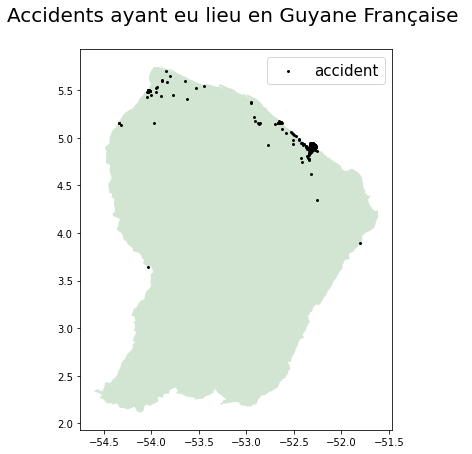

In [82]:
fig,ax = plt.subplots(figsize = (7,7))
guyane_map.plot(ax= ax, alpha = 0.4, color="darkseagreen")
geo_df_G.plot(ax=ax, markersize = 15, color = "black", marker=".", label = "accident")
plt.legend(prop={'size': 15})
plt.title("Accidents ayant eu lieu en Guyane Française \n", fontsize=20)                
plt.savefig('map_Gu_accidents.png')

### REUNION

In [83]:
df_map_R = df_map[df_map['gps'] == "R"]
df_map_R.head()

,Num_Acc,date,gps,lat,long,gravite
53597,201800056061,2018-06-08,R,2092287.0,5534416.0,4.0
53598,201800056062,2018-10-08,R,2095742.0,5533616.0,2.0
53599,201800056063,2018-01-11,R,2089648.0,5556809.0,2.0
53600,201800056064,2018-03-08,R,2089714.0,5556354.0,3.0
53601,201800056065,2018-07-16,R,2090239.0,5553550.0,4.0


In [84]:
df_map_R = df_map_R.astype({"lat": int, "long": int})
df_map_R.lat.describe()

count    5.980000e+02
mean     2.116212e+06
std      1.414955e+05
min      2.087000e+06
25%      2.093782e+06
50%      2.104841e+06
75%      2.129760e+06
max      5.542440e+06
Name: lat, dtype: float64

In [85]:
df_map_R.loc[:, ['lat']] = (df_map_R[['lat']]/100000 ) * -1
df_map_R.head()

,Num_Acc,date,gps,lat,long,gravite
53597,201800056061,2018-06-08,R,-20.92287,5534416,4.0
53598,201800056062,2018-10-08,R,-20.95742,5533616,2.0
53599,201800056063,2018-01-11,R,-20.89648,5556809,2.0
53600,201800056064,2018-03-08,R,-20.89714,5556354,3.0
53601,201800056065,2018-07-16,R,-20.90239,5553550,4.0


In [86]:
df_map_R.long.describe()

count    5.980000e+02
mean     5.539760e+06
std      1.402386e+05
min      2.130070e+06
25%      5.532247e+06
50%      5.546284e+06
75%      5.551023e+06
max      5.582655e+06
Name: long, dtype: float64

In [87]:
df_map_R.loc[:, ['long']] = df_map_R[['long']]/100000 
df_map_R.head()

,Num_Acc,date,gps,lat,long,gravite
53597,201800056061,2018-06-08,R,-20.92287,55.34416,4.0
53598,201800056062,2018-10-08,R,-20.95742,55.33616,2.0
53599,201800056063,2018-01-11,R,-20.89648,55.56809,2.0
53600,201800056064,2018-03-08,R,-20.89714,55.56354,3.0
53601,201800056065,2018-07-16,R,-20.90239,55.53550,4.0


In [88]:
df_map_R = df_map_R[(df_map_R['lat'] > -25.00000) ]

In [89]:
reunion_map = gpd.read_file('C:/Users/laura/OneDrive/Documents/MAG3/Semestre 1/Methodologie des études économétriques/Projet Méthodologie/map/departement-974-La-Reunion')

<AxesSubplot:>

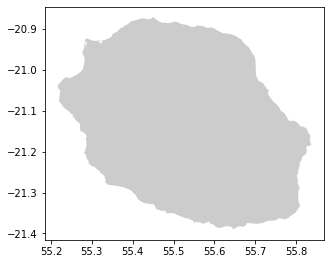

In [90]:
fig,ax = plt.subplots(figsize = (5,5))
reunion_map.plot(ax= ax, alpha = 0.4, color="grey")

In [91]:
df_map_R = df_map_R
crs = {'init':'epsg:4326'}
df_map_R.head()

,Num_Acc,date,gps,lat,long,gravite
53597,201800056061,2018-06-08,R,-20.92287,55.34416,4.0
53598,201800056062,2018-10-08,R,-20.95742,55.33616,2.0
53599,201800056063,2018-01-11,R,-20.89648,55.56809,2.0
53600,201800056064,2018-03-08,R,-20.89714,55.56354,3.0
53601,201800056065,2018-07-16,R,-20.90239,55.53550,4.0


In [92]:
geometry_R = [Point(xy) for xy in zip(df_map_R["long"], df_map_R["lat"])]
geometry_R[:3]

In [93]:
geo_df_R = gpd.GeoDataFrame(df_map_R, 
                         crs = crs,
                         geometry = geometry_R)
geo_df_R.head()

,Num_Acc,date,gps,lat,long,gravite,geometry
53597,201800056061,2018-06-08,R,-20.92287,55.34416,4.0,POINT (55.34416 -20.92287)
53598,201800056062,2018-10-08,R,-20.95742,55.33616,2.0,POINT (55.33616 -20.95742)
53599,201800056063,2018-01-11,R,-20.89648,55.56809,2.0,POINT (55.56809 -20.89648)
53600,201800056064,2018-03-08,R,-20.89714,55.56354,3.0,POINT (55.56354 -20.89714)
53601,201800056065,2018-07-16,R,-20.90239,55.53550,4.0,POINT (55.53550 -20.90239)


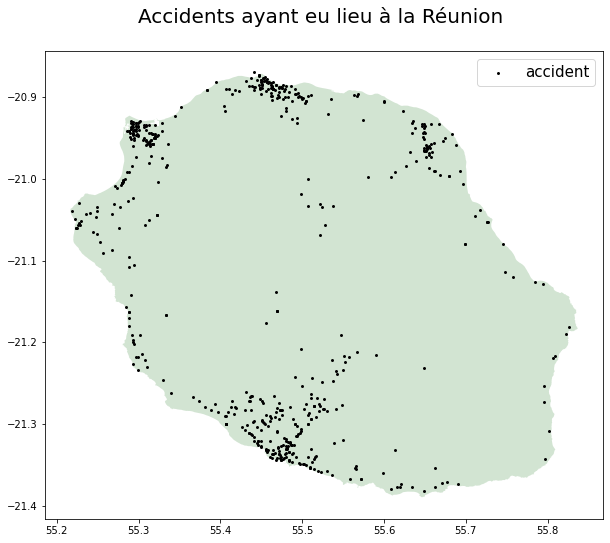

In [94]:
fig,ax = plt.subplots(figsize = (10,10))
reunion_map.plot(ax= ax, alpha = 0.4, color="darkseagreen")
geo_df_R.plot(ax=ax, markersize = 15, color = "black", marker=".", label = "accident")
plt.legend(prop={'size': 15})
plt.title("Accidents ayant eu lieu à la Réunion \n", fontsize=20)                
plt.savefig('map_R_accidents.png')

### MAYOTTE

In [95]:
df_map_Y = df_map[df_map['gps'] == "Y"]
df_map_Y.head()

,Num_Acc,date,gps,lat,long,gravite
53696,201800056161,2018-01-25,Y,1286878.0,4520563.0,2.0
53697,201800056162,2018-02-28,Y,1273454.0,4519948.0,2.0
53698,201800056163,2018-05-20,Y,1274606.0,4522118.0,2.0
53699,201800056164,2018-06-15,Y,1274664.0,4522692.0,2.0
53700,201800056165,2018-11-12,Y,1273428.0,4515932.0,2.0


In [96]:
df_map_Y = df_map_Y.astype({"lat": int, "long": int})
df_map_Y.lat.describe()

count    2.730000e+02
mean     1.279107e+06
std      3.808236e+03
min      1.268899e+06
25%      1.277176e+06
50%      1.278480e+06
75%      1.280028e+06
max      1.297642e+06
Name: lat, dtype: float64

In [97]:
df_map_Y.loc[:, ['lat']] = (df_map_Y[['lat']]/100000 ) * -1
df_map_Y.head()

,Num_Acc,date,gps,lat,long,gravite
53696,201800056161,2018-01-25,Y,-12.86878,4520563,2.0
53697,201800056162,2018-02-28,Y,-12.73454,4519948,2.0
53698,201800056163,2018-05-20,Y,-12.74606,4522118,2.0
53699,201800056164,2018-06-15,Y,-12.74664,4522692,2.0
53700,201800056165,2018-11-12,Y,-12.73428,4515932,2.0


In [98]:
df_map_Y.long.describe()

count    2.730000e+02
mean     4.521168e+06
std      3.483337e+03
min      4.508703e+06
25%      4.520729e+06
50%      4.522181e+06
75%      4.522657e+06
max      4.529976e+06
Name: long, dtype: float64

In [99]:
df_map_Y.loc[:, ['long']] = df_map_Y[['long']]/100000 
df_map_Y.head()

,Num_Acc,date,gps,lat,long,gravite
53696,201800056161,2018-01-25,Y,-12.86878,45.20563,2.0
53697,201800056162,2018-02-28,Y,-12.73454,45.19948,2.0
53698,201800056163,2018-05-20,Y,-12.74606,45.22118,2.0
53699,201800056164,2018-06-15,Y,-12.74664,45.22692,2.0
53700,201800056165,2018-11-12,Y,-12.73428,45.15932,2.0


In [100]:
df_map_R = df_map_R[(df_map_R['lat'] > -25.00000) ]

In [101]:
mayotte_map = gpd.read_file('C:/Users/laura/OneDrive/Documents/MAG3/Semestre 1/Methodologie des études économétriques/Projet Méthodologie/map/departement-976-Mayotte')

<AxesSubplot:>

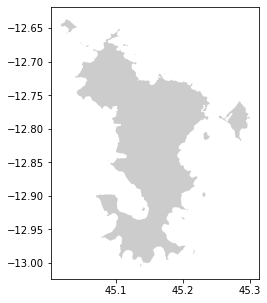

In [102]:
fig,ax = plt.subplots(figsize = (5,5))
mayotte_map.plot(ax= ax, alpha = 0.4, color="grey")

In [103]:
df_map_Y = df_map_Y
crs = {'init':'epsg:4326'}
df_map_Y.head()

,Num_Acc,date,gps,lat,long,gravite
53696,201800056161,2018-01-25,Y,-12.86878,45.20563,2.0
53697,201800056162,2018-02-28,Y,-12.73454,45.19948,2.0
53698,201800056163,2018-05-20,Y,-12.74606,45.22118,2.0
53699,201800056164,2018-06-15,Y,-12.74664,45.22692,2.0
53700,201800056165,2018-11-12,Y,-12.73428,45.15932,2.0


In [104]:
geometry_Y = [Point(xy) for xy in zip(df_map_Y["long"], df_map_Y["lat"])]
geometry_Y[:3]

In [105]:
geo_df_Y = gpd.GeoDataFrame(df_map_Y, 
                         crs = crs,
                         geometry = geometry_Y)
geo_df_Y.head()

,Num_Acc,date,gps,lat,long,gravite,geometry
53696,201800056161,2018-01-25,Y,-12.86878,45.20563,2.0,POINT (45.20563 -12.86878)
53697,201800056162,2018-02-28,Y,-12.73454,45.19948,2.0,POINT (45.19948 -12.73454)
53698,201800056163,2018-05-20,Y,-12.74606,45.22118,2.0,POINT (45.22118 -12.74606)
53699,201800056164,2018-06-15,Y,-12.74664,45.22692,2.0,POINT (45.22692 -12.74664)
53700,201800056165,2018-11-12,Y,-12.73428,45.15932,2.0,POINT (45.15932 -12.73428)


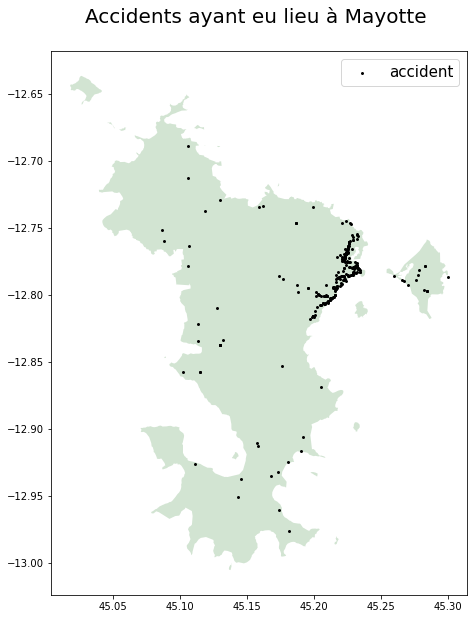

In [106]:
fig,ax = plt.subplots(figsize = (10,10))
mayotte_map.plot(ax= ax, alpha = 0.4, color="darkseagreen")
geo_df_Y.plot(ax=ax, markersize = 15, color = "black", marker=".", label = "accident")
plt.legend(prop={'size': 15})
plt.title("Accidents ayant eu lieu à Mayotte \n ", fontsize=20)                
plt.savefig('map_M_accidents.png')